In [ ]:

import numpy as np
import os, json, cv2, random



In [ ]:
!pip install pyyaml==5.1
# This is the current pytorch version on Colab. Uncomment this if Colab changes its pytorch version
# !pip install torch==1.9.0+cu102 torchvision==0.10.0+cu102 -f https://download.pytorch.org/whl/torch_stable.html

# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!git clone https://github.com/facebookresearch/detectron2.git
!python -m pip install -e detectron2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
fatal: destination path 'detectron2' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/detectron2
  Preparing metadata (setup.py) ... done
  Attempting uninstall: detectron2
    Found existing installation: detectron2 0.6
    Can't uninstall 'detectron2'. No files were found to uninstall.
  Running setup.py develop for detectron2


In [ ]:
import os

import detectron2
!python -m pip install -e detectron2.utils.logger
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
import json
from detectron2.data.datasets import register_coco_instances

ERROR: detectron2.utils.logger is not a valid editable requirement. It should either be a path to a local project or a VCS URL (beginning with bzr+http, bzr+https, bzr+ssh, bzr+sftp, bzr+ftp, bzr+lp, bzr+file, git+http, git+https, git+ssh, git+git, git+file, hg+file, hg+http, hg+https, hg+ssh, hg+static-http, svn+ssh, svn+http, svn+https, svn+svn, svn+file).


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[04/17 18:20:36 d2.data.datasets.coco]: Loading /content/drive/MyDrive/Mart/iii/label/train.json takes 1.75 seconds.
[04/17 18:20:36 d2.data.datasets.coco]: Loaded 432 images in COCO format from /content/drive/MyDrive/Mart/iii/label/train.json
{'file_name': '/content/drive/MyDrive/Mart/iii/im_train/10-500-03-V-9mm-4000x12_8_6.png', 'height': 256, 'width': 256, 'image_id': 432, 'annotations': [{'iscrowd': 0, 'bbox': [-0.5, -0.5, 256.0, 253.0], 'category_id': 0, 'segmentation': [[255.0, 252.5, 255.5, 161.0, 183.5, 86.0, 193.0, 75.5, 179.0, 68.5, 162.0, 69.5, 146.5, 64.0, 189.0, 28.5, 218.0, 35.5, 234.0, 33.5, 251.0, 24.5, 255.5, 6.0, 251.0, -0.5, 223.0, -0.5, 214.0, 9.5, 207.0, 9.5, 199.0, 8.5, 191.0, -0.5, 60.0, -0.5, 59.5, 2.0, 64.0, 13.5, 25.0, -0.5, 10.0, -0.5, 7.0, 4.5, -0.5, 1.0, -0.5, 75.0, 4.0, 79.5, 63.0, 123.5, 99.0, 159.5, 123.0, 166.5, 138.0, 174.5,

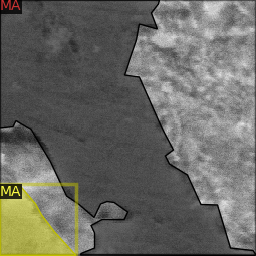

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/MyDrive/Mart/iii")


import json
from detectron2.data.datasets import register_coco_instances
try :

 register_coco_instances("train1", {}, "/content/drive/MyDrive/Mart/iii/label/train.json", "/content/drive/MyDrive/Mart/iii/im_train")
except Exception as e :
  print(repr(e))

import random
from detectron2.utils.visualizer import Visualizer

train_metadata_1 = MetadataCatalog.get("train1")
dataset_dicts_1 = DatasetCatalog.get("train1")
print(dataset_dicts_1[-1])
for d in random.sample(dataset_dicts_1, 1):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata_1, scale=1)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:
from detectron2.data import transforms as T
from PIL import Image
import numpy as np

w, h = 256,256

augs = T.AugmentationList([
    T.RandomBrightness(0.9,1.1),
    T.RandomContrast(0.9,1.1),
    T.RandomFlip(1,horizontal=False,vertical=True)


])
os.chdir("/content/drive/MyDrive/Mart/iii/im_train")
l=os.listdir(os.getcwd())
new_ann=[]
new_nam=[]
c=2263
for i in range(len(l)) :

  d=dataset_dicts_1[i]
  im=np.array(Image.open(d['file_name']))
  input = T.AugInput(im)
  transform = augs(input)
  image_transformed = input.image
  data = np.zeros((h, w), dtype=np.uint8)
  data= np.array(image_transformed)
  img = Image.fromarray(data, 'L')
  imgname="aug"+str(433+i)+".png"
  os.chdir("/content/drive/MyDrive/Mart/iii/Aug")
  img.save(imgname)
  os.chdir("/content/drive/MyDrive/Mart/iii/im_train")




  d=dataset_dicts_1[i]
  dict={}
  dict["file_name"]=imgname
  dict["id"]=433+i
  dict["height"]=256
  dict["width"]=256
  new_nam.append(dict)
  for ann in range(len(d["annotations"])):
    c=c+1
    d["annotations"][ann]['bbox'][1]=256-d["annotations"][ann]['bbox'][1]-d["annotations"][ann]['bbox'][3]
    for k in range(1,len(d["annotations"][ann]['segmentation'][0]),2) :
      d["annotations"][ann]['segmentation'][0][k]=256-d["annotations"][ann]['segmentation'][0][k]
    new_ann.append({"segmentation": [d["annotations"][ann]['segmentation'][0]], "area": 1, "iscrowd": 0, "image_id": 433+i, "bbox": d["annotations"][ann]['bbox'], "category_id": 1, "id": c})




KeyboardInterrupt: ignored

In [ ]:
newjson={
    "info": {},
    "licenses": [],
    "images":new_nam,
    "annotations":new_ann,
    "categories": [{"supercategory": "MA", "id": 1, "name": "MA"}]
}
with open("/content/drive/MyDrive/Mart/iii/newann.json", "w") as outfile:
    json.dump(newjson, outfile)


In [ ]:
name='re'
try :

 register_coco_instances(name, {},"/content/drive/MyDrive/Mart/iii/newann.json", "/content/drive/MyDrive/Mart/iii/Aug")
except Exception as e :
  print(repr(e))

import random
from detectron2.utils.visualizer import Visualizer

test1_metadata = MetadataCatalog.get(name)
dataset1_dicts_test = DatasetCatalog.get(name)
for d in random.sample(dataset1_dicts_test, 1):
    img = cv2.imread(d["file_name"])
    cv2_imshow(img)
    visualizer = Visualizer(img[:, :, ::-1], metadata=test1_metadata, scale=1)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:
with open('/content/drive/MyDrive/Mart/iii/label/train.json') as json_file:
    megdata = json.load(json_file)
print(megdata.keys())
megdata["images"]=megdata["images"].extend(new_nam)
megdata["annotations"]=megdata["annotations"].extend(new_ann)
with open("/content/drive/MyDrive/Mart/iii/label/joinann.json", "w") as outfile:
    json.dump(newjson, outfile)

In [ ]:
fro = "/content/drive/MyDrive/Mart/iii/Aug"
to="/content/drive/MyDrive/Mart/iii/im_join"
os.chdir(fro)
l=os.listdir(os.getcwd())
os.chdir(to)
print(l[0])
for i in range(len(l)) :

  im=np.array(Image.open(os.path.join(fro,l[i])))
  img = Image.fromarray(im, 'L')
  imgname=str(l[i])
  # print(imgname)
  img.save(imgname)



In [ ]:
name='jo'
try :

 register_coco_instances(name, {},"/content/drive/MyDrive/Mart/iii/label/joinann.json", "/content/drive/MyDrive/Mart/iii/im_join")
except Exception as e :
  print(repr(e))

import random
from detectron2.utils.visualizer import Visualizer

test1_metadata = MetadataCatalog.get(name)
dataset1_dicts_test = DatasetCatalog.get(name)
for d in random.sample(dataset1_dicts_test, 1):
    img = cv2.imread(d["file_name"])
    cv2_imshow(img)
    visualizer = Visualizer(img[:, :, ::-1], metadata=test1_metadata, scale=1)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')